<a href="https://colab.research.google.com/github/ManishaKumari96/hello-world/blob/master/Bank_loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import style
style.use('ggplot')


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df=pd.read_csv('/content/drive/My Drive/Bank_Personal_Loan_Modelling.csv')

In [0]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


In [0]:
df.shape

(5000, 14)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [0]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [0]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [0]:
df.apply(lambda x:len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [0]:
df[['CreditCard','Online','CD Account','Securities Account']].apply(lambda x:x.unique())


,CreditCard,Online,CD Account,Securities Account
0,0,0,0,1
1,1,1,1,0


In [0]:
df['Mortgage'].unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

*Visualization*
MORTAGE

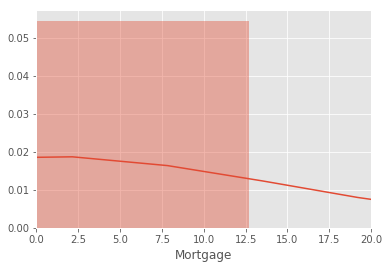

In [0]:
sns.distplot(df['Mortgage'])
plt.xlim(0,20)
plt.show()


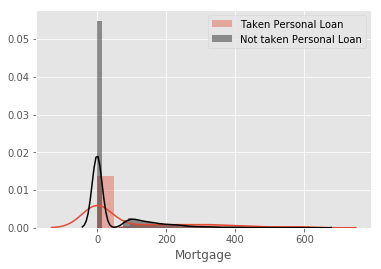

In [0]:
sns.distplot(df[df['Personal Loan']==1]['Mortgage'],label='Taken Personal Loan')
sns.distplot(df[df['Personal Loan']==0]['Mortgage'],color='k',label='Not taken Personal Loan')
#plt.axvline(x=2.7)

plt.legend()
#plt.xticks(np.arange(0,10,step=1))
plt.show()

In [0]:
df1=df[df['Mortgage']>0]
df1.shape

(1538, 14)

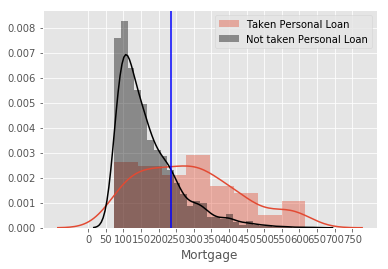

In [0]:
sns.distplot(df1[df1['Personal Loan']==1]['Mortgage'],label='Taken Personal Loan')
sns.distplot(df1[df1['Personal Loan']==0]['Mortgage'],color='k',label='Not taken Personal Loan')
plt.axvline(x=235,color='blue')

plt.legend()
plt.xticks(np.arange(0,800,step=50))
plt.show()


In [0]:
df['CCAvg'].unique().min()


0.0

In [0]:
df['CCAvg'].unique().max()


10.0

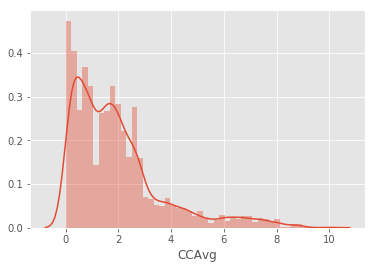

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df['CCAvg'])
plt.show()


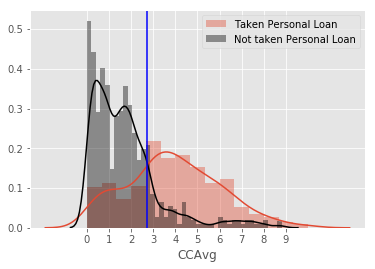

In [0]:
import numpy as np

sns.distplot(df[df['Personal Loan']==1]['CCAvg'],label='Taken Personal Loan')
sns.distplot(df[df['Personal Loan']==0]['CCAvg'],color='k',label='Not taken Personal Loan')
plt.axvline(x=2.7,color='blue')

plt.legend()
plt.xticks(np.arange(0,10,step=1))
plt.show()

In [0]:
a=df['Personal Loan']-df['Online']
len(a.unique())

3

In [0]:
a.unique()

array([ 0, -1,  1])

In [0]:
len(a[a==-1])

2693

In [0]:
len(a[a==1])

189

In [0]:
len(a[a==0])

2118

In [0]:
print('Taken Personal Loan')
print('Offline',len(a[a==1]),len(a[a==1])/5000,'Online',480-len(a[a==1]),(480-len(a[a==1]))/5000)
print('Number of individual using offline & online method')
print('offline approach', len(a[a==1])+2118-291,'online approach',2693+291)
print('Proportion of individual using offline & online method')
print('offline approach' ,(len(a[a==1])+2118-291)/5000,'online approach',(2693+291)/5000)

Taken Personal Loan
Offline 189 0.0378 Online 291 0.0582
Number of individual using offline & online method
offline approach 2016 online approach 2984
Proportion of individual using offline & online method
offline approach 0.4032 online approach 0.5968


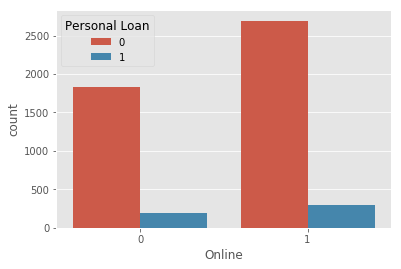

In [0]:
sns.countplot(x='Online',hue="Personal Loan",data=df)
plt.show()

ZIP CODE

In [0]:
len(df[df['Personal Loan']==1]['ZIP Code'].unique())


238

In [0]:
len(df[df['Personal Loan']==0]['ZIP Code'].unique())


467

In [0]:
s1=set(df[df['Personal Loan']==1]['ZIP Code'])
s2=set(df[df['Personal Loan']==0]['ZIP Code'])
k=list(s2-s1)
len(s2-s1)

229

ZIP CODE that does not take loan

In [0]:
import pandas as pd
L=[]

for i in k:
    L.append(len(df[df['ZIP Code']==i]))
    
L1=pd.DataFrame({'Zip Code': k,"Count":L})
print(L1)

#m=pd.DataFrame(map(lambda x:len(df[df['ZIP Code']==x]), k))
#m   

     Zip Code  Count
0       92161      2
1       92673      3
2       90638      5
3       90639      4
4       92177      3
5       92691     17
6       92692      3
7       92694      1
8       92703      5
9       92192      5
10      92704      6
11      92705      2
12      93727      6
13      91706      6
14      91709      6
15      91710      3
16      92735      4
17      95812      6
18      91207      2
19      95816      2
20      95817      5
21      95307      2
22      95820      4
23      95821      7
24      95825      4
25      91730      6
26      95827     11
27      94806      3
28      95833      8
29      92251      3
..        ...    ...
199     92103     13
200     92104      8
201     90058      6
202     92109      6
203     92624      4
204     90066      6
205     92115     13
206     92116      2
207     90068      1
208     92630      8
209     92120     17
210     95193      2
211     92634      5
212     93657      3
213     92129      4
214     92130

In [0]:
L1[L1['Count']>1].shape

(218, 2)

In [0]:
L1['Count'].max()


27

EDUCATION

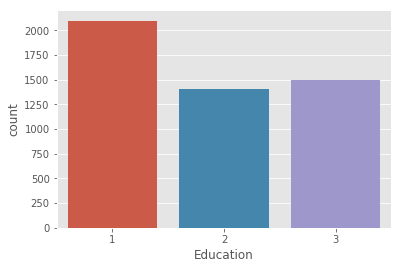

In [0]:
sns.countplot(x='Education',data=df)
plt.show()

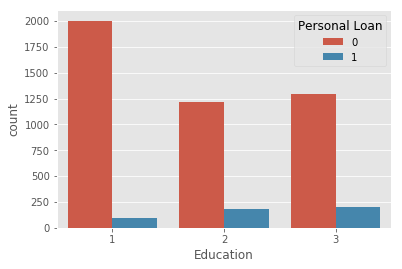

In [0]:
sns.countplot(x='Education',hue="Personal Loan",data=df)
plt.show()

AGE

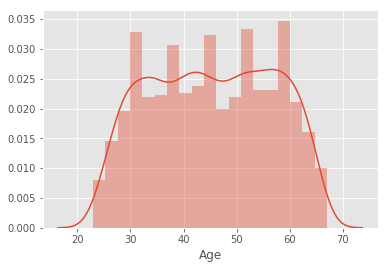

In [0]:
sns.distplot(df['Age'])
plt.show()

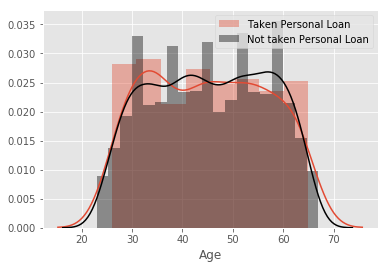

In [0]:
sns.distplot(df[df['Personal Loan']==1]['Age'],label='Taken Personal Loan')
sns.distplot(df[df['Personal Loan']==0]['Age'],color='k',label='Not taken Personal Loan')

plt.legend()
plt.show()

EXPERIENCE}

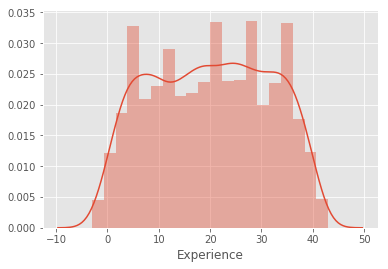

In [0]:
sns.distplot(df['Experience'])
plt.show()

In [0]:
df['Experience'].min()


-3

In [0]:
df[df['Experience']<0].shape

(52, 14)

In [0]:
df[df['Experience']<0].shape


(52, 14)

In [0]:
df['Experience']=abs(df['Experience'])

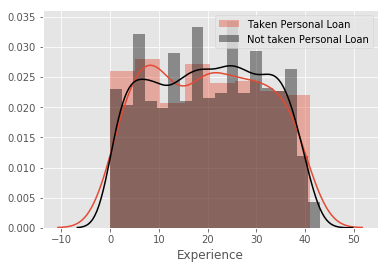

In [0]:
sns.distplot(df[df['Personal Loan']==1]['Experience'],label='Taken Personal Loan')
sns.distplot(df[df['Personal Loan']==0]['Experience'],color='k',label='Not taken Personal Loan')
plt.legend()
plt.show()

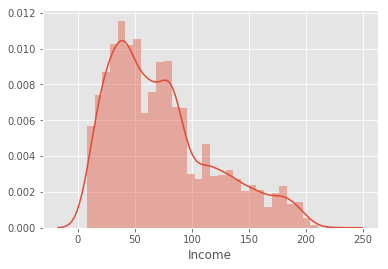

In [0]:
sns.distplot(df['Income'])
plt.show()

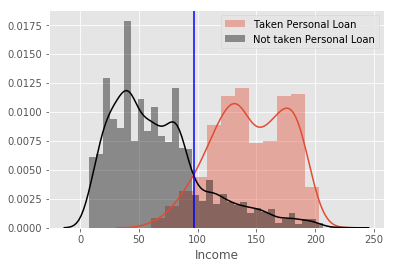

In [0]:
import numpy as np

sns.distplot(df[df['Personal Loan']==1]['Income'],label='Taken Personal Loan')
sns.distplot(df[df['Personal Loan']==0]['Income'],color='k',label='Not taken Personal Loan')
plt.axvline(x=97,color='blue')

plt.legend()
plt.show()

In [0]:
df['Income Category']=pd.cut(df['Income'],bins=[0,50,100,150,200,250],labels=[1,2,3,4,5])
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income Category
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,1
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,2
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1


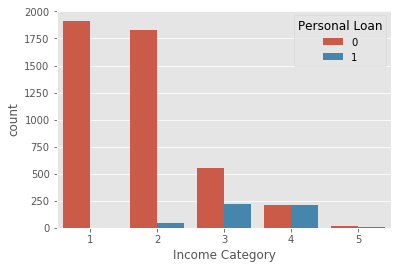

In [0]:
sns.countplot(x='Income Category',hue='Personal Loan',data=df)
plt.show()

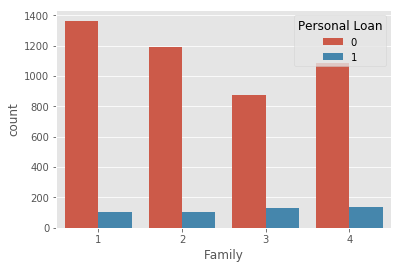

In [0]:
sns.countplot(x='Family',hue='Personal Loan',data=df)
plt.show()

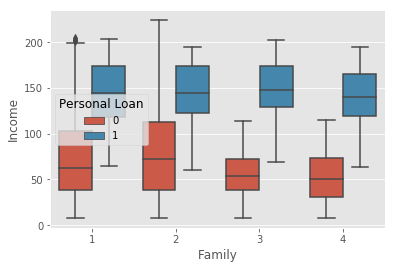

In [0]:
sns.boxplot(x='Family',y='Income',hue='Personal Loan',data=df)
plt.show()

In [0]:
df['Age'].min()

23

In [0]:
df['Age'].max()


67

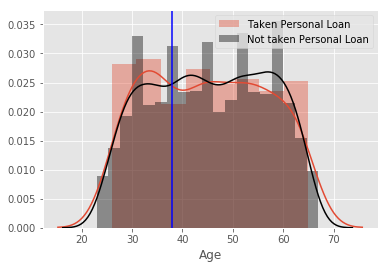

In [0]:
sns.distplot(df[df['Personal Loan']==1]['Age'],label='Taken Personal Loan')
sns.distplot(df[df['Personal Loan']==0]['Age'],color='k',label='Not taken Personal Loan')
plt.axvline(x=38,color='blue')

plt.legend()
plt.show()


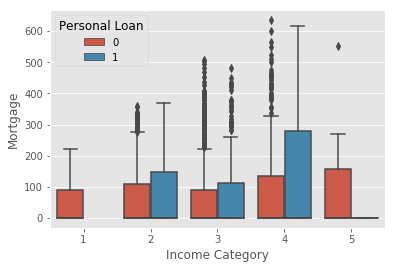

In [0]:
sns.boxplot(x='Income Category',y='Mortgage',hue='Personal Loan',data=df)
plt.show()


MODEL PREPARation

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df.drop(['Income Category'],axis=1), test_size=0.25 , random_state=0)
train=train.drop(['ID'],axis=1)
train_label = train.pop('Personal Loan')
index=test.pop('ID')
test_label = test.pop('Personal Loan')
print('Train size  -->',train.shape)
print('Train-label size   -->',len(train_label))
print('Test size   -->',test.shape)
print('Test-label size   -->',len(test_label))

Train size  --> (3750, 12)
Train-label size   --> 3750
Test size   --> (1250, 12)
Test-label size   --> 1250


# DECISION TREE

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree , n_estimators=100,random_state=0)


In [0]:
bag.fit(train,train_label)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [0]:
train.shape

(3750, 12)

In [0]:
pred1=bag.predict(test)

print("Training Accuracy = ", bag.score(train, train_label))
print("Test Accuracy = ", bag.score(test, test_label))

Training Accuracy =  1.0
Test Accuracy =  0.984


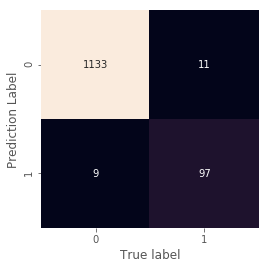

In [0]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_label,pred1)
sns.heatmap(matrix.T,square=True,annot=True, fmt='d',cbar=False)

plt.xlabel('True label')
plt.ylabel('Prediction Label')
plt.show()

#Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(train,train_label)

ypred=model.predict(test)

In [0]:
from sklearn import metrics
print(metrics.classification_report(ypred,test_label))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1150
           1       0.88      0.95      0.91       100

    accuracy                           0.99      1250
   macro avg       0.94      0.97      0.95      1250
weighted avg       0.99      0.99      0.99      1250



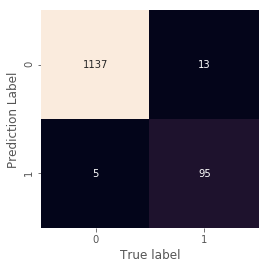

In [0]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_label,ypred)
sns.heatmap(mat.T,square=True,annot=True, fmt='d',cbar=False)

plt.xlabel('True label')
plt.ylabel('Prediction Label')
plt.show()

In [0]:
print("Training Accuracy = ", model.score(train, train_label))
print("Test Accuracy = ", model.score(test, test_label))

Training Accuracy =  1.0
Test Accuracy =  0.9856


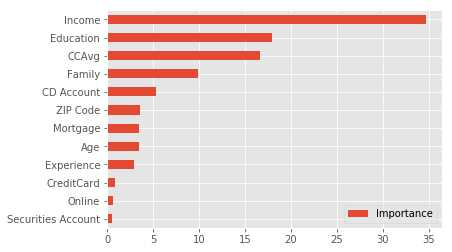

In [0]:
Importance = pd.DataFrame({'Importance':model.feature_importances_*100}, index=train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh')
plt.show()

# MODEL PREPARATION

In [0]:
data=df
data.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income Category
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,1
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,2
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1


In [0]:
data['Experience']=abs(data['Experience'])


In [0]:
data.drop('ID',axis=1)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income Category
0,25,1,49,91107,4,1.60,1,0,0,1,0,0,0,1
1,45,19,34,90089,3,1.50,1,0,0,1,0,0,0,1
2,39,15,11,94720,1,1.00,1,0,0,0,0,0,0,1
3,35,9,100,94112,1,2.70,2,0,0,0,0,0,0,2
4,35,8,45,91330,4,1.00,2,0,0,0,0,0,1,1
5,37,13,29,92121,4,0.40,2,155,0,0,0,1,0,1
6,53,27,72,91711,2,1.50,2,0,0,0,0,1,0,2
7,50,24,22,93943,1,0.30,3,0,0,0,0,0,1,1
8,35,10,81,90089,3,0.60,2,104,0,0,0,1,0,2
9,34,9,180,93023,1,8.90,3,0,1,0,0,0,0,4


In [0]:
from sklearn.model_selection import train_test_split
train1, test1 = train_test_split(data.drop(['CreditCard','Online','Securities Account'],axis=1), test_size=0.25 , random_state=0)

In [0]:
train1=train1.drop(['ID'],axis=1)
train_label1 = train1.pop('Personal Loan')
index1=test1.pop('ID')
test_label1 = test1.pop('Personal Loan')

In [0]:
print('Train size  -->',train1.shape)
print('Train-label size   -->',len(train_label1))
print('Test size   -->',test1.shape)
print('Test-label size   -->',len(test_label1))

Train size  --> (3750, 10)
Train-label size   --> 3750
Test size   --> (1250, 10)
Test-label size   --> 1250


#DECISION TREE

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree1 = DecisionTreeClassifier()
bag1 = BaggingClassifier(tree1 , n_estimators=100,random_state=1)

bag1.fit(train1,train_label1)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [0]:
train1.shape

(3750, 10)

In [0]:
pred2=bag1.predict(train1)

print("Training Accuracy = ", bag1.score(train1, train_label1))
print("Test Accuracy = ", bag1.score(test1, test_label1))

Training Accuracy =  1.0
Test Accuracy =  0.9864


In [0]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=100,random_state=0)
model1.fit(train1,train_label1)

ypred1=model1.predict(test1)

In [0]:
from sklearn import metrics
print(metrics.classification_report(ypred1,test_label1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1148
           1       0.89      0.94      0.91       102

    accuracy                           0.99      1250
   macro avg       0.94      0.97      0.95      1250
weighted avg       0.99      0.99      0.99      1250



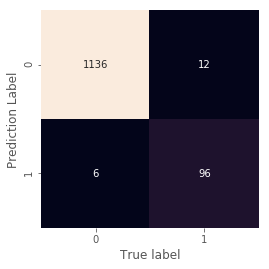

In [0]:
from sklearn.metrics import confusion_matrix
mat1 = confusion_matrix(test_label1,ypred1)
sns.heatmap(mat1.T,square=True,annot=True, fmt='d',cbar=False)

plt.xlabel('True label')
plt.ylabel('Prediction Label')
plt.show()

In [0]:
print("Training Accuracy = ", model1.score(train1, train_label1))
print("Test Accuracy = ", model1.score(test1, test_label1))

Training Accuracy =  1.0
Test Accuracy =  0.9856


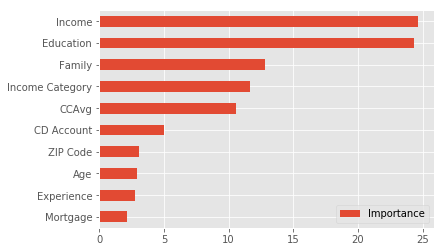

In [0]:
Importance1 = pd.DataFrame({'Importance':model1.feature_importances_*100}, index=train1.columns)
Importance1.sort_values('Importance', axis=0, ascending=True).plot(kind='barh')
plt.show()

MODEL SUMMARY

In [0]:
Acuraccy=[bag.score(test, test_label),model.score(test, test_label),bag1.score(test1, test_label1),model1.score(test1, test_label1)]
Model_Name=['Dccision Tree','Random Forest','Decision Tree','Random Forest']
                                                                                                               
Model_Feature=['AllFeatures','AllFeatures','only 9 Features','only 9 Features']

Final_Report=pd.DataFrame({'Model Description':Model_Name,'Model_Feature':Model_Feature,'Acuraccy':Acuraccy})
Final_Report

,Model Description,Model_Feature,Acuraccy
0,Dccision Tree,AllFeatures,0.9840
1,Random Forest,AllFeatures,0.9856
2,Decision Tree,only 9 Features,0.9864
3,Random Forest,only 9 Features,0.9856


In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
model=GaussianNB()
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [0]:
model.fit(train1,train_label1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
ypred1=model.predict(test1)

In [0]:
ypred1

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
from sklearn import metrics
print(metrics.classification_report(ypred1,test_label1))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1069
           1       0.73      0.44      0.55       181

    accuracy                           0.90      1250
   macro avg       0.82      0.70      0.74      1250
weighted avg       0.88      0.90      0.88      1250



In [0]:
model.score(test1,test_label1)

0.8952

**SVM**

In [0]:
from sklearn.svm import SVC

In [0]:
model=SVC()

In [0]:
#model=SVC(kernel='linear',C=1E10)

In [0]:
model.fit(train1,train_label1)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
ypred1=model.predict(test1)

In [0]:
ypred1

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
from sklearn import metrics
print(metrics.classification_report(ypred1,test_label1))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1250
           1       0.00      0.00      0.00         0

    accuracy                           0.91      1250
   macro avg       0.50      0.46      0.48      1250
weighted avg       1.00      0.91      0.95      1250



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
model.score(test1,test_label1)

0.9136